In [1]:
import pandas as pd

data = pd.read_csv("../data/design-seeds.csv")

In [2]:
data.head()

,image_path,palette_path
0,data/design-seeds-data/0.jpg,data/design-seeds-data/0.npy
1,data/design-seeds-data/1.jpg,data/design-seeds-data/1.npy
2,data/design-seeds-data/2.jpg,data/design-seeds-data/2.npy
3,data/design-seeds-data/3.jpg,data/design-seeds-data/3.npy
4,data/design-seeds-data/4.jpg,data/design-seeds-data/4.npy


In [3]:
multiplier = 7

# RecolorDataset

In [4]:
from repalette.utils.data import RecolorDataset
from repalette.constants import IMAGE_SIZE
from matplotlib import pyplot as plt

dataset = RecolorDataset(data=data, multiplier=multiplier, resize=IMAGE_SIZE)

In [5]:
from torch.utils.data import DataLoader

data_loader = DataLoader(dataset, batch_size=multiplier, shuffle=False)

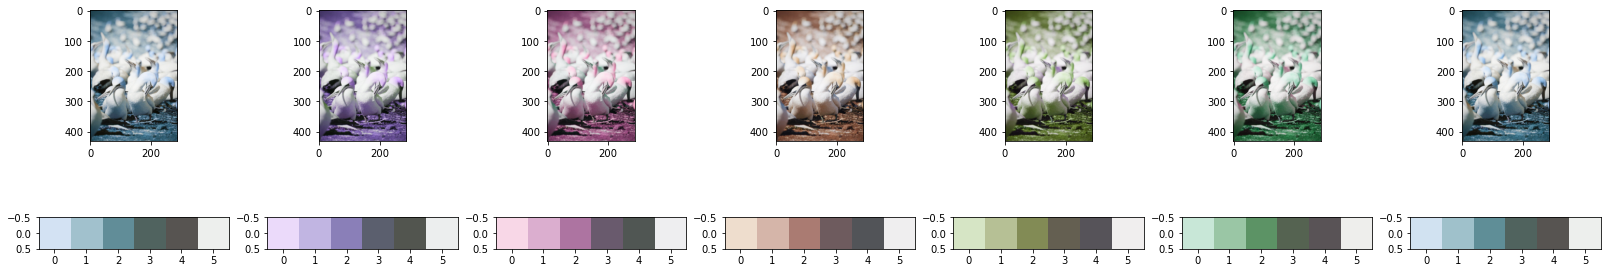

In [6]:
from skimage.color import lab2rgb

# plot first batch
batch = next(iter(data_loader))
from matplotlib import pyplot as plt
f, ax = plt.subplots(nrows=2, ncols=multiplier,  figsize=(multiplier*4, 20))
for i in range(multiplier):
    ax[0, i].imshow(lab2rgb(batch[0][i].permute(1, 2, 0)))
    ax[1, i].imshow(lab2rgb(batch[1][i].permute(1, 2, 0)))
plt.subplots_adjust(bottom=0.8, top=1)
plt.show()

# PairRecolorDataset

In [7]:
from repalette.utils.data import PairRecolorDataset

pair_dataset = PairRecolorDataset(data=data, multiplier=multiplier, resize=IMAGE_SIZE)

In [8]:
len(pair_dataset)

3696

In [9]:
iter_data_loader = iter(DataLoader(pair_dataset, batch_size=multiplier, shuffle=False))

In [10]:
(img_1, palette_1), (img_2, palette_2) = next(iter_data_loader)

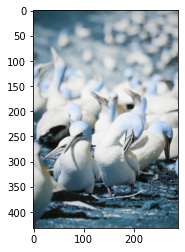

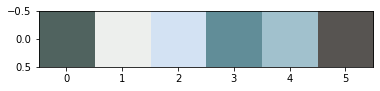

In [11]:
plt.imshow(lab2rgb(img_1[0].permute(1, 2, 0)))
plt.show()
plt.imshow(lab2rgb(palette_1[0].permute(1, 2, 0)))
plt.show()

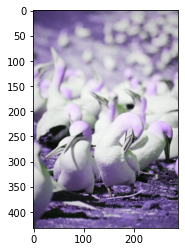

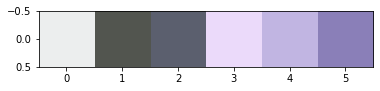

In [12]:
plt.imshow(lab2rgb(img_2[0].permute(1, 2, 0)))
plt.show()
plt.imshow(lab2rgb(palette_2[0].permute(1, 2, 0)))
plt.show()

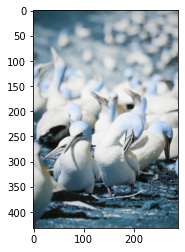

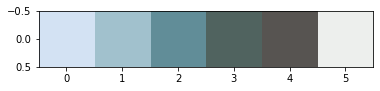

In [13]:
plt.imshow(lab2rgb(img_1[1].permute(1, 2, 0)))
plt.show()
plt.imshow(lab2rgb(palette_1[1].permute(1, 2, 0)))
plt.show()

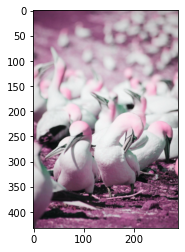

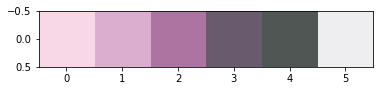

In [14]:
plt.imshow(lab2rgb(img_2[1].permute(1, 2, 0)))
plt.show()
plt.imshow(lab2rgb(palette_2[1].permute(1, 2, 0)))
plt.show()

## Test `PairRecolorDataset.shuffle()`

In [15]:
data_loader_iter = iter(DataLoader(pair_dataset.shuffle(True), batch_size=multiplier, shuffle=False))
(img_1, palette_1), (img_2, palette_2) = next(data_loader_iter)

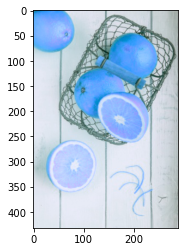

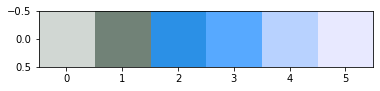

In [16]:
plt.imshow(lab2rgb(img_1[0].permute(1, 2, 0)))
plt.show()
plt.imshow(lab2rgb(palette_1[0].permute(1, 2, 0)))
plt.show()

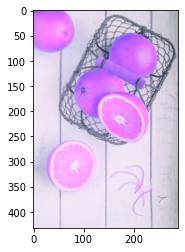

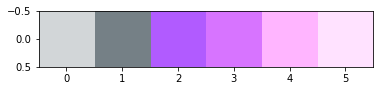

In [17]:
plt.imshow(lab2rgb(img_2[0].permute(1, 2, 0)))
plt.show()
plt.imshow(lab2rgb(palette_2[0].permute(1, 2, 0)))
plt.show()

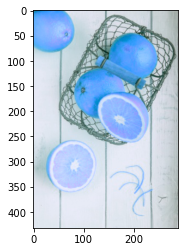

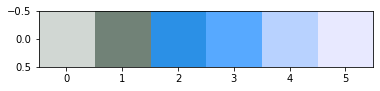

In [18]:
plt.imshow(lab2rgb(img_1[1].permute(1, 2, 0)))
plt.show()
plt.imshow(lab2rgb(palette_1[1].permute(1, 2, 0)))
plt.show()

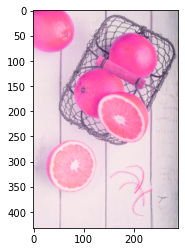

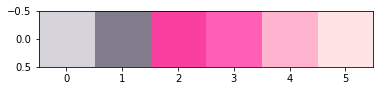

In [19]:
plt.imshow(lab2rgb(img_2[1].permute(1, 2, 0)))
plt.show()
plt.imshow(lab2rgb(palette_2[1].permute(1, 2, 0)))
plt.show()

## Unshuffle

In [20]:
pair_dataset.shuffle(False)
data_loader_iter = iter(DataLoader(pair_dataset.shuffle(False), batch_size=multiplier, shuffle=False))
(img_1, palette_1), (img_2, palette_2) = next(data_loader_iter)

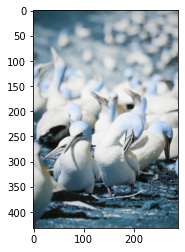

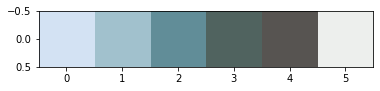

In [21]:
plt.imshow(lab2rgb(img_1[0].permute(1, 2, 0)))
plt.show()
plt.imshow(lab2rgb(palette_1[0].permute(1, 2, 0)))
plt.show()

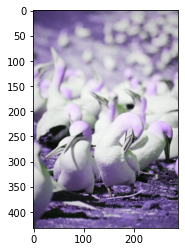

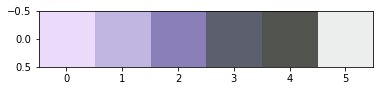

In [22]:
plt.imshow(lab2rgb(img_2[0].permute(1, 2, 0)))
plt.show()
plt.imshow(lab2rgb(palette_2[0].permute(1, 2, 0)))
plt.show()

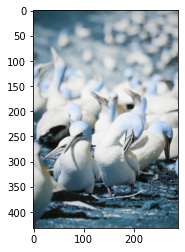

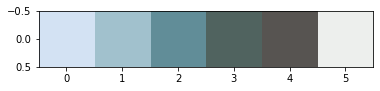

In [23]:
plt.imshow(lab2rgb(img_1[1].permute(1, 2, 0)))
plt.show()
plt.imshow(lab2rgb(palette_1[1].permute(1, 2, 0)))
plt.show()

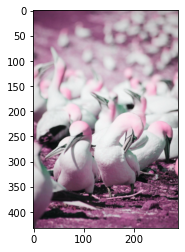

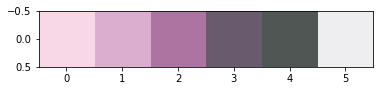

In [24]:
plt.imshow(lab2rgb(img_2[1].permute(1, 2, 0)))
plt.show()
plt.imshow(lab2rgb(palette_2[1].permute(1, 2, 0)))
plt.show()

In [29]:
palette = palette_1

In [50]:
import torch

In [70]:
conv = nn.Conv1d(1, 3, 3, 3, 0, 1)

In [75]:
conv(palette1)

tensor([[[ -0.3536,  -2.3204,  -4.2872,  -6.2540,  -8.2208, -10.1876],
         [ -1.0777,  -0.5479,  -0.0182,   0.5116,   1.0413,   1.5711],
         [ -0.2852,  -0.1728,  -0.0603,   0.0522,   0.1647,   0.2771]]],
       grad_fn=<SqueezeBackward1>)

In [72]:
palette2 = torch.tensor([3, 4, 5, 0, 1, 2, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]).float().view(-1, 1, 18)

In [74]:
conv(palette2)

tensor([[[ -2.3204,  -0.3536,  -4.2872,  -6.2540,  -8.2208, -10.1876],
         [ -0.5479,  -1.0777,  -0.0182,   0.5116,   1.0413,   1.5711],
         [ -0.1728,  -0.2852,  -0.0603,   0.0522,   0.1647,   0.2771]]],
       grad_fn=<SqueezeBackward1>)

In [136]:
p = torch.rand(1, 3, 6)

In [137]:
rand1 = torch.rand(3)
rand2 = torch.rand(3)

In [138]:
p1 = p.clone()
p2 = p.clone()

In [141]:
p1[:, :, 0] = rand1
p1[:, :, 1] = rand2
p2[:, :, 1] = rand1
p2[:, :, 0] = rand2

In [159]:
conv = nn.Conv2d(1, 3, (3, 1), (1, 1), (0, 0), (1, 1))

In [160]:
conv(p1.unsqueeze(1)).shape

torch.Size([1, 3, 1, 6])

In [161]:
conv(p2.unsqueeze(1)).shape

torch.Size([1, 3, 1, 6])

In [168]:
conv.weight.data.shape

torch.Size([3, 1, 3, 1])

In [163]:
perm(p2)

tensor([[[0.4527, 1.0994, 1.1338, 0.5713, 0.9958, 0.9476],
         [0.3110, 1.6362, 0.5598, 1.0870, 1.3853, 1.5277],
         [0.6814, 1.5835, 1.1372, 0.7398, 1.6653, 1.1259]]])

AttributeError: 'Tensor' object has no attribute 'copy'